## pTA1_FASIIb



    >1590_ZA+EcacpS2
    gtcgaggaacgccaggttgcccactttctcactagtgacctgcagccgacaaatggcaatattaggtttaggcacggatattgtg

    >1576_RPL17A+ZA
    gtcggctgcaggtcactagtgagaaagtgggcaacctggcgttcctcgactaattaatttaatctattagtagttcttga






                                           ==================== red =========================                   
    1590  3' tcaagaactactaatagattaaattaattagtcgaggaacgccaggttgcccactttctcactagtgacctgcagccgac 5'
                                           --------------------------------------------------
                                                                 \/
                                                                 /\
                                           --------------------------------------------------
                                        5' gtcgaggaacgccaggttgcccactttctcactagtgacctgcagccgacaaatggcaatattaggtttaggcacggatattgtg 3'  1576
                                        
                                        
                                        
                                        
    pYPK0_PDC1_EcfabH_TEF1_EcfabD_FBA1_EcfabG_RPL22A_EcacpP_TDH3_EcfabF_UTR2_EcfabB_TPI1_EcfabA_PMP3_EcfabZ_ENO2_Athmod1_RPL5_AthfatA1_RPL16A_AthfatB_RPL17A_-------------_EcacpS_TMA19 (pYPK0_FATIIb)
    pYPK0_PDC1_EcfabH_TEF1_EcfabD_FBA1_EcfabG_RPL22A_EcacpP_TDH3_EcfabF_UTR2_EcfabB_TPI1_EcfabA_PMP3_EcfabZ_ENO2_Athmod1_RPL5_AthfatA1_RPL16A_AthfatB_RPL17A_EcacpH_RPL16B_EcacpS_TMA19 (pYPK0_FATII)



In [1]:
from pydna.readers import read

In [2]:
pTA1_FASII = read("pTA1_FASII.gb")

In [3]:
# pTA1_FASII.features = []

In [4]:
assert pTA1_FASII.cseguid() == "GsaGCT5nmHM4ixNQocrG-EvFVAY" # 2022-03-17T17:43:15

In [5]:
assert pTA1_FASII.cseguid() in pTA1_FASII.annotations["comment"]

In [7]:
assert len(pTA1_FASII) == 26279

In [8]:
from pydna.parsers import parse_primers

p = {}

p[167], p[626], p[153], p[623], p[207], p[621], p[419], p[764], p[830], p[1576], p[1590], p[512], p[500], p[1195], p[984], p[497] = parse_primers('''

>167_pCAPSfw (24-mer) NEW (2021-01-05)
TCCTGACGGGTAATTTTGATTTGC

>626_ScTEF1tpr_PacI (35-mer)
taattaaTTTGTAATTAAAACTTAGATTAGATTGC

>153_TEF1promfwd (29-mer)
TCTTCAATTTCTCAAGTTTCAGTTTCATT

>623_ScTDH3tpr_PacI (33-mer)
taattaaTTTGTTTGTTTATGTGTGTTTATTCG

>207_GPDp_01F new (2021-04-26)
TCTTACACCTTCTATTACCTTCTG

>621_ScTPI1tpr_PacI (35-mer)
taattaaTTTTAGTTTATGTATGTGTTTTTTGTAG

>419_ScTPI1tpf (32-mer)
TTAAATTGTTTAAAGATTACGGATATTTAACT

>764_RPL16A_rv (27-mer)
taattaaTTTCTCGATTTGTTCTTCAC

>830_RPL5tpf (27-mer)
ttaaatTTGTAAATACAAAGTCATTCA

>1576_RPL17A+ZA
gtcggctgcaggtcactagtgagaaagtgggcaacctggcgttcctcgactaattaattt
aatctattagtagttcttga

>1590_ZA+EcacpS2
gtcgaggaacgccaggttgcccactttctcactagtgacctgcagccgacaaatggcaat
attaggtttaggcacggatattgtg

>512_crp_EcoRV (29-mer)
ttcgccaattgattcaggtaaatccggat

>500_pCAPsEcoRV5Pr sits in yellow part of pYPKa three first nt are half of EcoRV
ATCcggatttacctgaatcaattggcgaaattttttgtacg

>1195_Pbr.REV
GTTGACTACTATTTACGCAGCAGATACGATCTCGTTTCATCGGT

>984_Micron.FW  Micron.FW
ATCGTATCTGCTGCGTAAATAGTAGTCAACGATCGTACTTGTTACCCAT

>497_pCAPsZraI5Pf
GTCAGCGGCCGCATTGCACAGACT

''')

In [9]:
primer_pairs = ( (167, 626),
                 (153, 623),
                 (207, 621),
                 (419, 764),
                 (830, 1576),
                 (1590, 512),
                 (500, 1195),
                 (984, 497), )

In [10]:
from pydna.amplify import pcr

In [11]:
pcr_fragments = []

In [12]:
for fpnum, rpnum in primer_pairs:
    fp = p[fpnum]
    rp = p[rpnum]
    pcr_fragments.append(pcr(fp, rp, pTA1_FASII))

In [13]:
pcr_fragments

[Amplicon(2697),
 Amplicon(4065),
 Amplicon(4109),
 Amplicon(6102),
 Amplicon(3934),
 Amplicon(911),
 Amplicon(2834),
 Amplicon(3449)]

In [14]:
from dna_features_viewer import BiopythonTranslator

2697
4065
4109
6102
3934
911
2834
3449


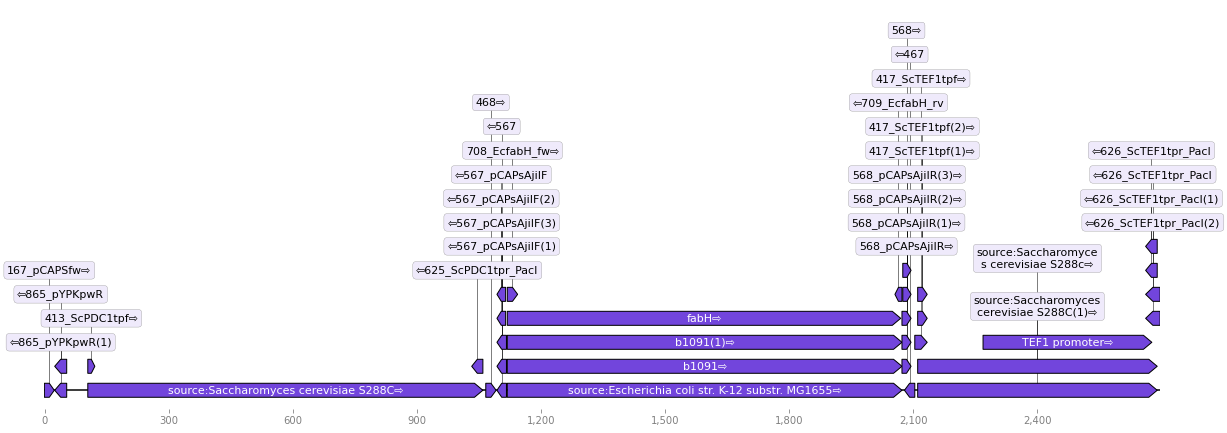

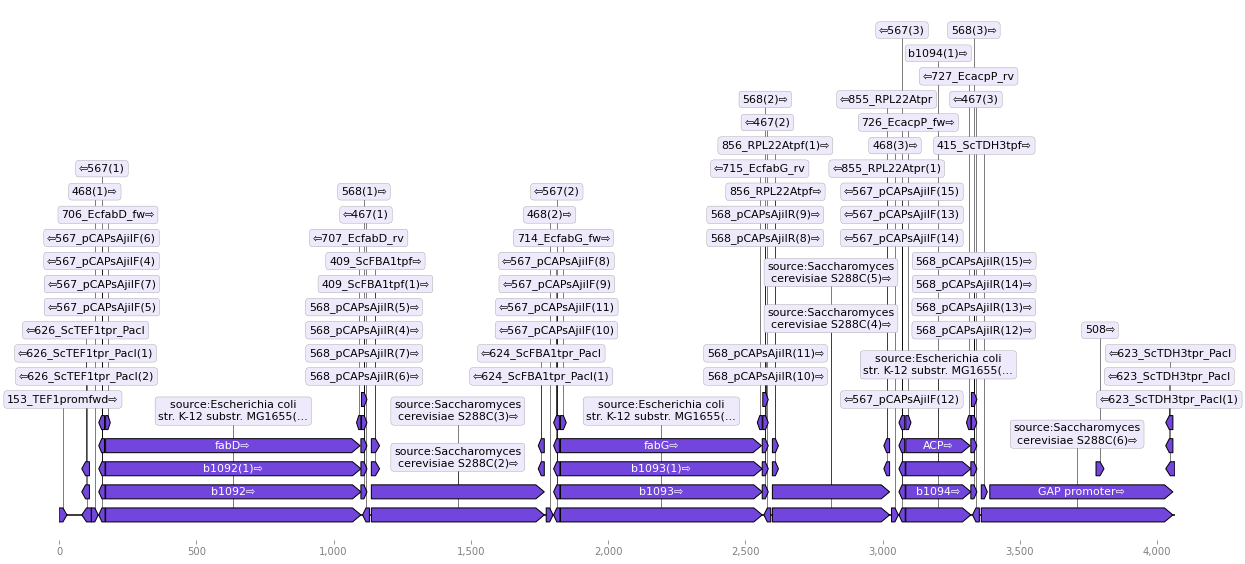

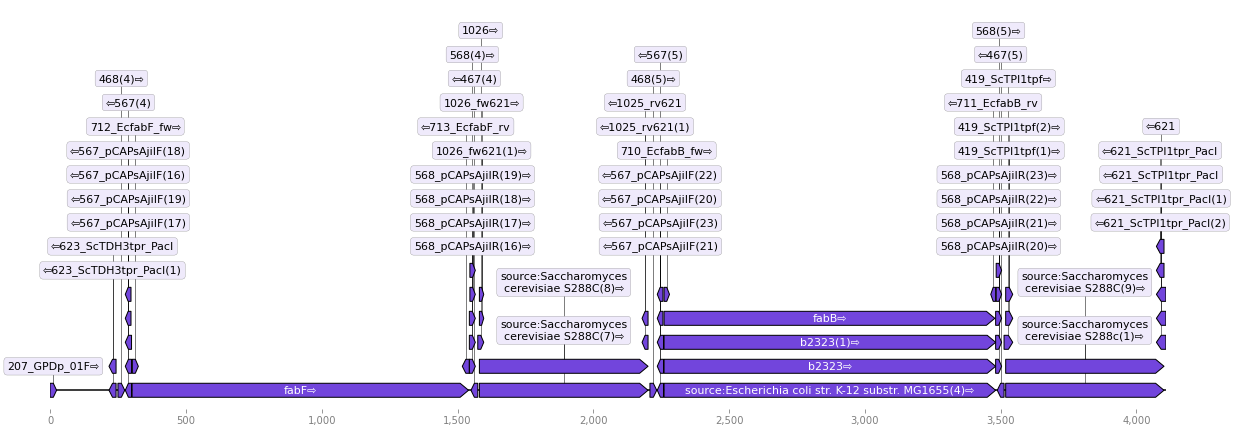

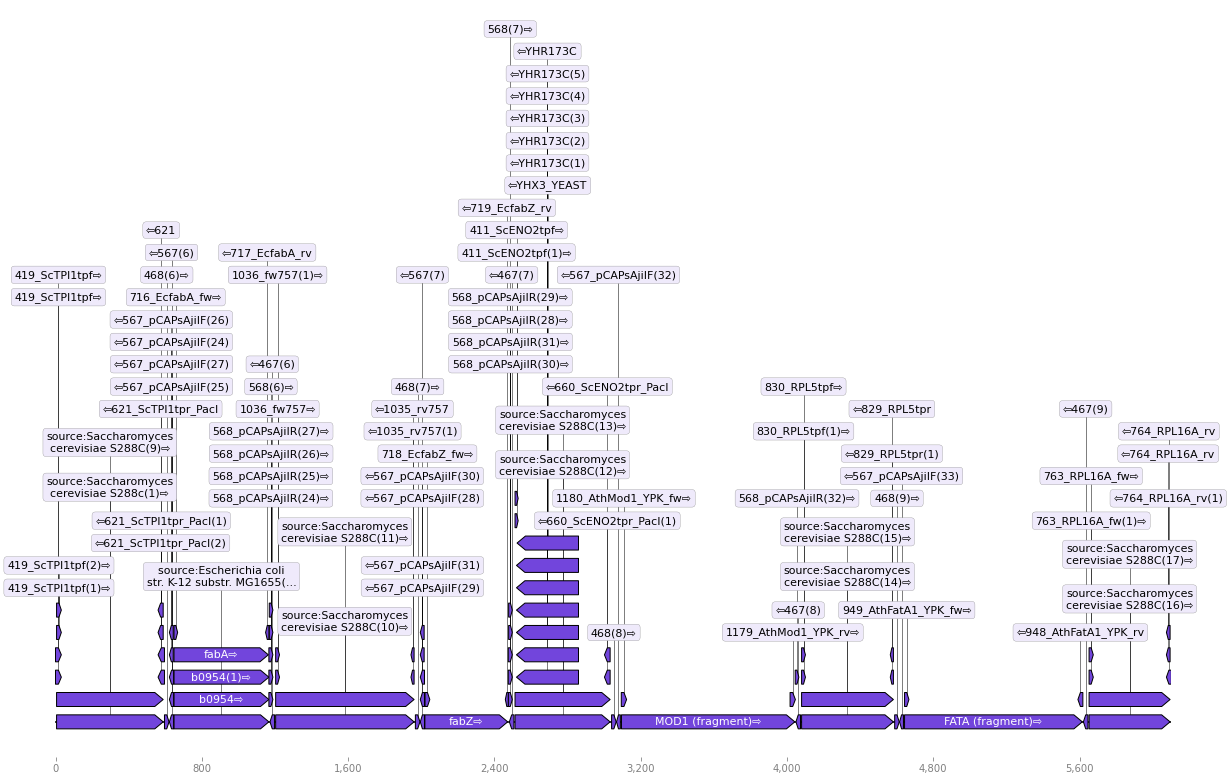

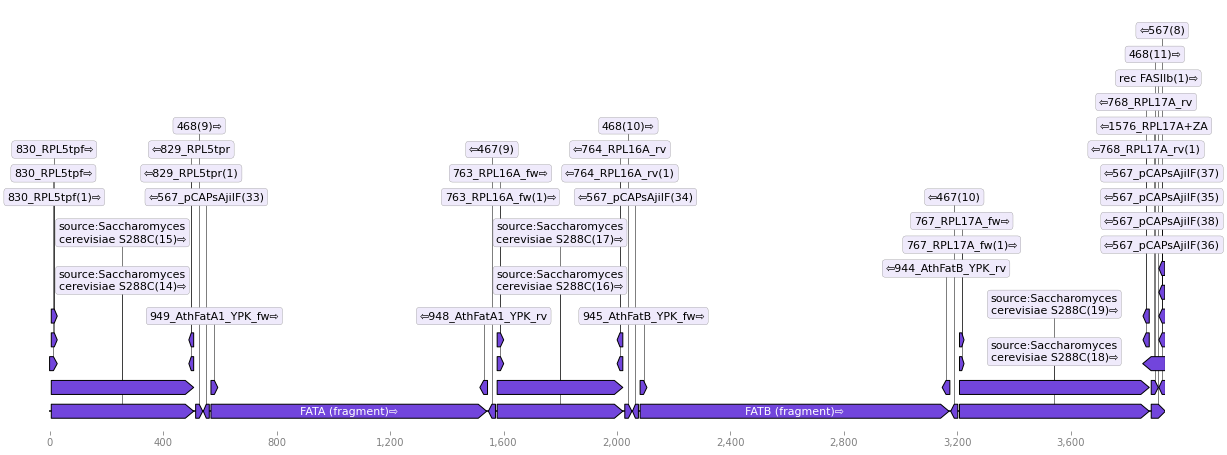

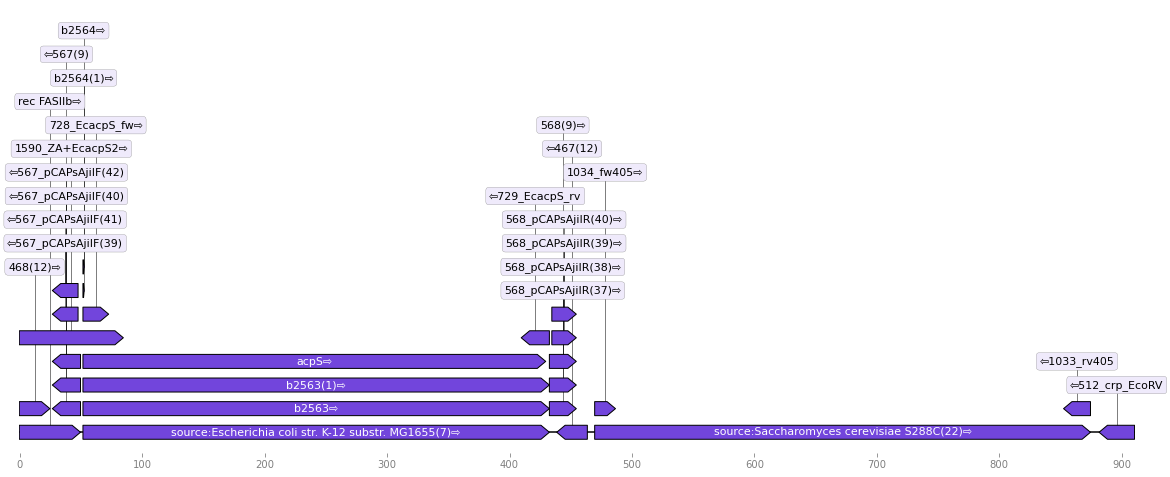

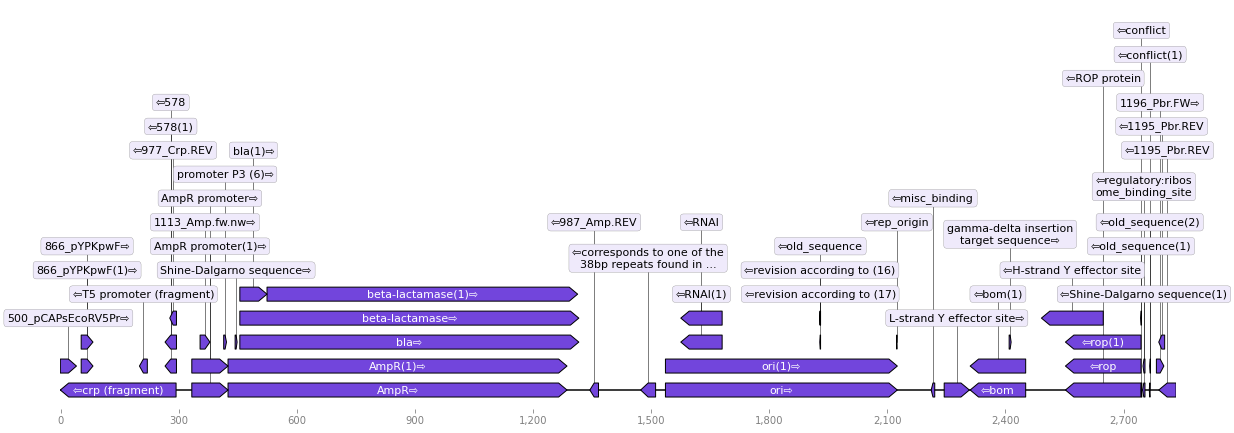

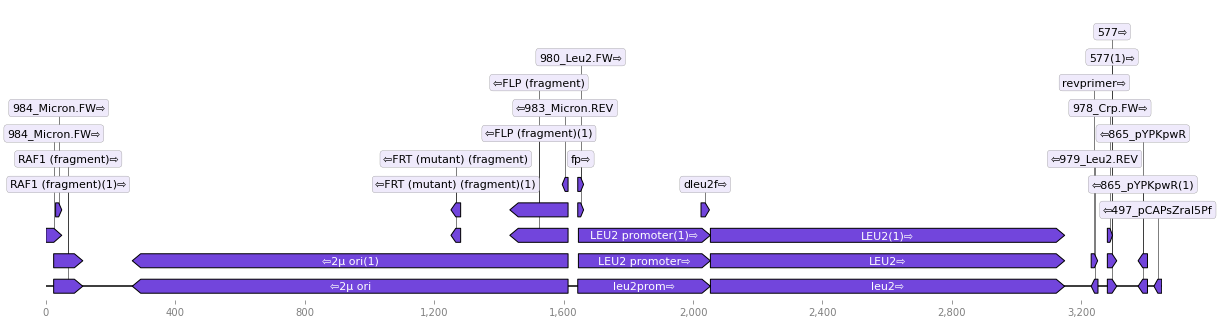

In [15]:
for f in pcr_fragments:
    graphic_record = BiopythonTranslator().translate_record(f)
    print(len(f))
    ax, _ = graphic_record.plot(figure_width=20, 
                                strand_in_label_threshold=700)
    

In [16]:
from pydna.assembly import Assembly
from pydna.common_sub_strings import terminal_overlap

In [17]:
asm = Assembly(pcr_fragments, limit=25, algorithm=terminal_overlap)
asm

Assembly
fragments..: 2697bp 4065bp 4109bp 6102bp 3934bp 911bp 2834bp 3449bp
limit(bp)..: 25
G.nodes....: 16
algorithm..: terminal_overlap

In [18]:
candidate, *rest = asm.assemble_circular()

In [19]:
rest

[Contig(o24902)]

In [20]:
candidate.figure()

 -|2697bp_PCR_prod|118
|                  \/
|                  /\
|                  118|4065bp_PCR_prod|250
|                                      \/
|                                      /\
|                                      250|4109bp_PCR_prod|596
|                                                          \/
|                                                          /\
|                                                          596|6102bp_PCR_prod|2028
|                                                                              \/
|                                                                              /\
|                                                                              2028|3934bp_PCR_prod|50
|                                                                                                   \/
|                                                                                                   /\
|                                                             

In [21]:
pw = candidate.synced("gttctgatcctcgagcatcttaagaattc")

In [22]:
assert len(pw) == 24902

In [23]:
assert pw.cseguid() == "ewtPJfoXMHrd6OKg_accddKPSjw"

In [24]:
pw.stamp("cSEGUID")

ewtPJfoXMHrd6OKg_accddKPSjw

In [25]:
pw.name = "pTA1_FASIIb"

In [26]:
pw.description = "π9"

In [27]:
pw.write(f"{pw.name}.gb")

pTA1_FASIIb.gb